In [1]:
# Import packages
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import itertools
import glob


In [2]:
data_folder = r"C:\Users\rsankar\Documents\Work\Alam JC\Alam JC\Alam JC\Oct 2024\Alam tests\Aux scripts\FlipTest\Data\\"
results_folder = r"C:\Users\rsankar\Documents\Work\Alam JC\Alam JC\Alam JC\Oct 2024\Alam tests\Aux scripts\FlipTest\Results\\"


In [3]:
data_file  = data_folder  + 'path_length_df.csv'
distances_df = pd.read_csv(data_file, index_col=0)
distances_df

,bird_id,iteration,rseed,distance,kdistance,n_syll,range_0_min,range_1_min,range_0_max,range_1_max
0,0,0,56755036,49.603840,52.074928,6,-16.302376,17.834356,-16.302376,17.834356
1,1,0,56755036,47.494719,48.703142,5,-16.302376,17.834356,-16.302376,17.834356
2,2,0,56755036,35.715927,35.872187,6,-16.302376,17.834356,-16.302376,17.834356
3,3,0,56755036,13.242254,16.606300,4,-16.302376,17.834356,-16.302376,17.834356
4,4,0,56755036,44.055370,47.606559,4,-16.302376,17.834356,-16.302376,17.834356
...,...,...,...,...,...,...,...,...,...,...
615,26,19,88409749,26.443624,28.635379,3,-16.302376,17.834356,-16.302376,17.834356
616,27,19,88409749,33.342761,29.591575,4,-16.302376,17.834356,-16.302376,17.834356
617,28,19,88409749,29.202572,31.240902,5,-16.302376,17.834356,-16.302376,17.834356
618,29,19,88409749,17.325166,19.958627,4,-16.302376,17.834356,-16.302376,17.834356


(31,)

In [4]:
n_birds = 31
n_iterations = 20


In [5]:
path_length_diff = np.zeros((n_birds, n_birds, n_iterations))
path_length_bysyll_diff = np.zeros((n_birds, n_birds, n_iterations))
path_length_diff_dict = {
    'bird1': [],
    'bird2': [],
    'iteration': [],
    'path_length_diff': [],
    'n_syll1': [],
    'n_syll2': [],
    'n_syll_diff': [],
    'path_length_bysyll_diff': []
}


In [6]:
xticklabels = []
xvals = []


In [7]:
xpos = 0
for i in tqdm(range(n_birds)):
    for j in range(n_birds):
        if i < j:
            for iter in range(n_iterations):
                kdisti = distances_df.loc[(distances_df.bird_id == i) & (distances_df.iteration == iter), 'kdistance'].values[0]
                kdistj = distances_df.loc[(distances_df.bird_id == j) & (distances_df.iteration == iter), 'kdistance'].values[0]

                nsylli = distances_df.loc[(distances_df.bird_id == i), 'n_syll'].values[0]
                nsyllj = distances_df.loc[(distances_df.bird_id == j), 'n_syll'].values[0]

                kdistdiff = kdistj - kdisti
                path_length_diff[i, j, iter] = kdistdiff

                kdistdiff_bysyll = kdistj/nsyllj - kdisti/nsylli
                path_length_bysyll_diff[i, j, iter] = kdistdiff_bysyll

                n_syll_diff = nsyllj - nsylli
                
                path_length_diff_dict['bird1'].append(i)
                path_length_diff_dict['bird2'].append(j)
                path_length_diff_dict['iteration'].append(iter)
                path_length_diff_dict['path_length_diff'].append(kdistdiff)
                path_length_diff_dict['n_syll1'].append(nsylli)
                path_length_diff_dict['n_syll2'].append(nsyllj)
                path_length_diff_dict['n_syll_diff'].append(n_syll_diff)
                path_length_diff_dict['path_length_bysyll_diff'].append(kdistdiff_bysyll)
                
                xvals.append(xpos)
            xpos += 1
            xticklabels.append(str(i) + ',' + str(j))

100%|██████████| 31/31 [00:04<00:00,  6.29it/s]


In [8]:
# Convert the dictionary to a pandas DataFrame
path_length_diff_df = pd.DataFrame(path_length_diff_dict)

# Save the DataFrame to a CSV file
path_length_diff_df.to_csv(results_folder + 'path_length_diff.csv', index=False)

path_length_diff_df

,bird1,bird2,iteration,path_length_diff,n_syll1,n_syll2,n_syll_diff,path_length_bysyll_diff
0,0,1,0,-3.371786,6,5,-1,1.061474
1,0,1,1,-2.113507,6,5,-1,0.835772
2,0,1,2,-17.201404,6,5,-1,-1.470072
3,0,1,3,7.970697,6,5,-1,2.774011
4,0,1,4,-2.229912,6,5,-1,0.777956
...,...,...,...,...,...,...,...,...
9295,29,30,15,46.073797,4,5,1,8.110972
9296,29,30,16,8.466000,4,5,1,0.028355
9297,29,30,17,-9.215456,4,5,1,-3.961958
9298,29,30,18,5.253328,4,5,1,-0.767905


In [9]:
nsyll_labels = path_length_diff_df.n_syll_diff.values
nsyll_labels.shape

(9300,)

In [10]:
ilabels = path_length_diff_df.loc[path_length_diff_df.iteration==0].bird1.values.astype(str)
ilabels

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6',
       '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6

In [11]:
jlabels = path_length_diff_df.loc[path_length_diff_df.iteration==0].bird2.values.astype(str)
jlabels

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22',

In [12]:
xticklabels = np.char.add(ilabels, ',')
xticklabels = np.char.add(xticklabels, jlabels)
xticklabels

array(['0,1', '0,2', '0,3', '0,4', '0,5', '0,6', '0,7', '0,8', '0,9',
       '0,10', '0,11', '0,12', '0,13', '0,14', '0,15', '0,16', '0,17',
       '0,18', '0,19', '0,20', '0,21', '0,22', '0,23', '0,24', '0,25',
       '0,26', '0,27', '0,28', '0,29', '0,30', '1,2', '1,3', '1,4', '1,5',
       '1,6', '1,7', '1,8', '1,9', '1,10', '1,11', '1,12', '1,13', '1,14',
       '1,15', '1,16', '1,17', '1,18', '1,19', '1,20', '1,21', '1,22',
       '1,23', '1,24', '1,25', '1,26', '1,27', '1,28', '1,29', '1,30',
       '2,3', '2,4', '2,5', '2,6', '2,7', '2,8', '2,9', '2,10', '2,11',
       '2,12', '2,13', '2,14', '2,15', '2,16', '2,17', '2,18', '2,19',
       '2,20', '2,21', '2,22', '2,23', '2,24', '2,25', '2,26', '2,27',
       '2,28', '2,29', '2,30', '3,4', '3,5', '3,6', '3,7', '3,8', '3,9',
       '3,10', '3,11', '3,12', '3,13', '3,14', '3,15', '3,16', '3,17',
       '3,18', '3,19', '3,20', '3,21', '3,22', '3,23', '3,24', '3,25',
       '3,26', '3,27', '3,28', '3,29', '3,30', '4,5', '4,6', '4,7',

In [13]:
xticks = np.arange(xticklabels.shape[0])
xticks

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [14]:
xticklabels.shape

(465,)

In [15]:
path_length_diff_yvals = path_length_diff_df.path_length_diff.values
path_length_diff_yvals = np.reshape(path_length_diff_yvals, (xticklabels.shape[0], n_iterations))
path_length_diff_yvals.shape

(465, 20)

In [16]:
path_length_bysyll_diff_yvals = path_length_diff_df.path_length_bysyll_diff.values
path_length_bysyll_diff_yvals = np.reshape(path_length_bysyll_diff_yvals, (xticklabels.shape[0], n_iterations))
path_length_bysyll_diff_yvals.shape

(465, 20)

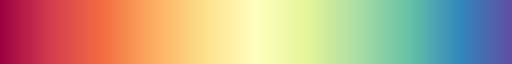

In [17]:

cmap = plt.get_cmap('Spectral')
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
cmap

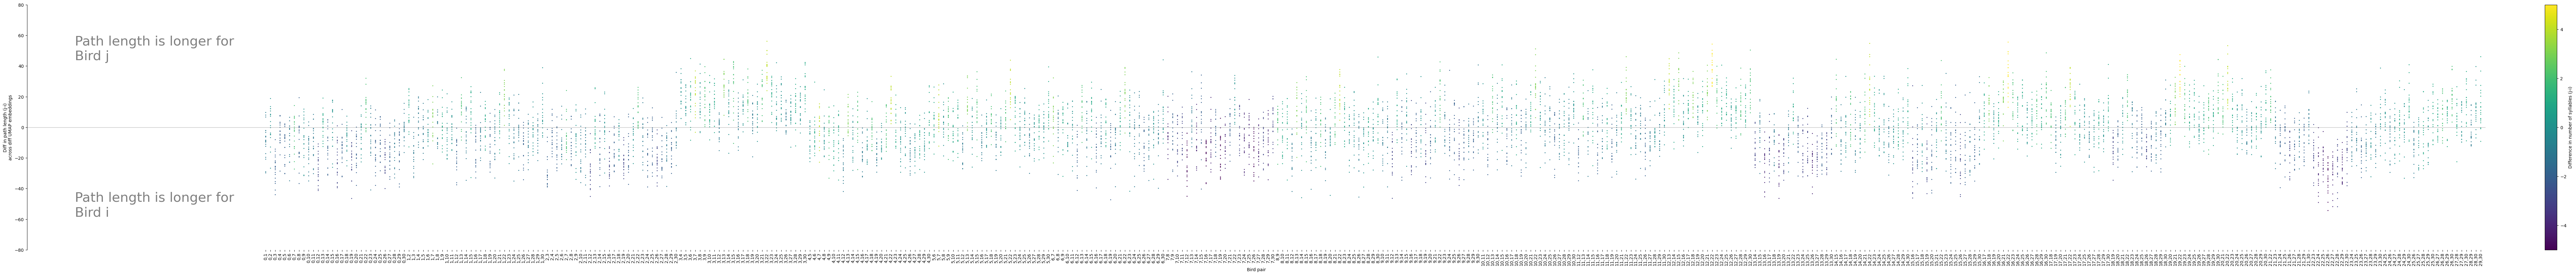

In [46]:

fig, ax = plt.subplots(figsize=(120,10))
cp = ax.scatter(xvals, path_length_diff_yvals, marker='.', s=5, c=nsyll_labels, alpha=1)

ax.axhline(y=0, color='grey', alpha=.5, linewidth=1)
ax.text(-40, 60, 'Path length is longer for\nBird j', color='grey', fontsize=30, va='top')
ax.text(-40, -60, 'Path length is longer for\nBird i', color='grey', fontsize=30, va='bottom')

ax.set_ylim(-80, 80)
ax.set_xlim(-50, xvals[-1]+1)

ax.set_xlabel('Bird pair')
ax.set_ylabel('Diff in path length (j-i)\nacross diff UMAP embeddings')

# Add a colorbar
cbar = fig.colorbar(cp, pad=0.02)
cbar.set_label('Difference in number of syllables (j-i)')

ax.set_xticks(xticks);

ax.set_xticklabels(xticklabels, rotation=90);

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



In [47]:
fig.savefig(results_folder + 'path_length_diff.pdf', bbox_inches='tight')
fig.savefig(results_folder + 'path_length_diff.png', bbox_inches='tight')

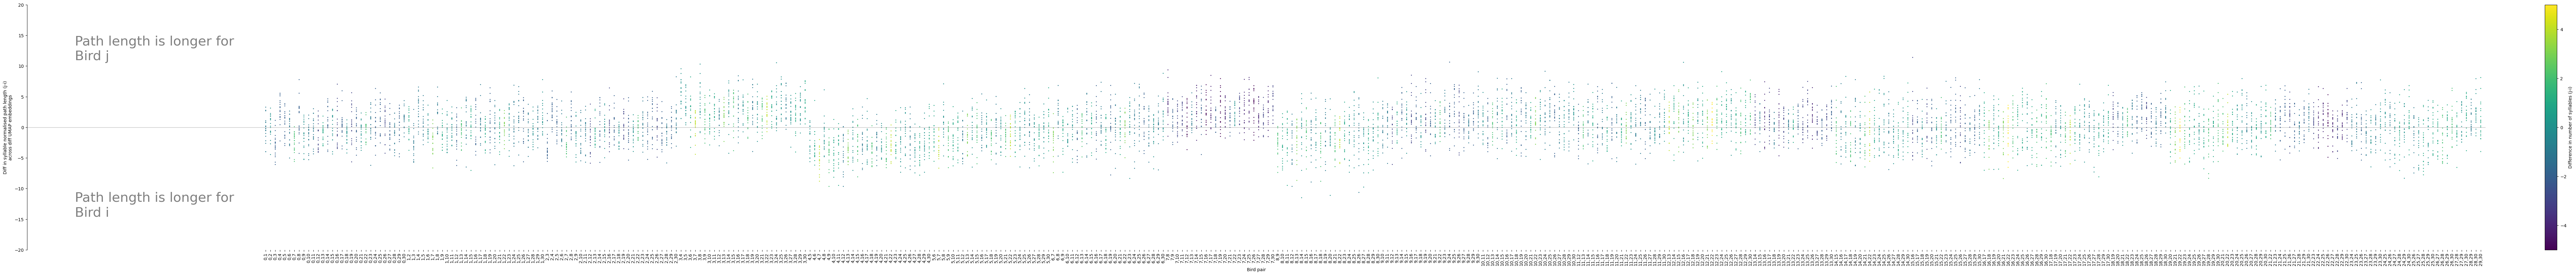

In [48]:

fig, ax = plt.subplots(figsize=(120,10))
cp = ax.scatter(xvals, path_length_bysyll_diff_yvals, marker='.', s=5, c=nsyll_labels, alpha=1)

ax.axhline(y=0, color='grey', alpha=.5, linewidth=1)
ax.text(-40, 15, 'Path length is longer for\nBird j', color='grey', fontsize=30, va='top')
ax.text(-40, -15, 'Path length is longer for\nBird i', color='grey', fontsize=30, va='bottom')

ax.set_ylim(-20, 20)
ax.set_xlim(-50, xvals[-1]+1)

ax.set_xlabel('Bird pair')
ax.set_ylabel('Diff in syllable normalised path length (j-i)\nacross diff UMAP embeddings')

# Add a colorbar
cbar = fig.colorbar(cp, pad=0.02)
cbar.set_label('Difference in number of syllables (j-i)')

ax.set_xticks(xticks);

ax.set_xticklabels(xticklabels, rotation=90);

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)



In [49]:
fig.savefig(results_folder + 'path_length_bysyll_diff.pdf', bbox_inches='tight')
fig.savefig(results_folder + 'path_length_bysyll_diff.png', bbox_inches='tight')

In [110]:
path_length_diff_prop_yvals = ((path_length_diff_yvals>0).sum(axis=1)/20)


In [113]:
overall_prop = np.mean(path_length_diff_prop_yvals) # Overall proportion of path length of bird j is longer than that of bird i
overall_prop

0.47290322580645155

In [114]:
prop_by_bird = np.mean(np.reshape(path_length_diff_prop_yvals, (31,465//31)), axis=1) # Per bird i, proportion of path length of bird j is longer than that of bird i
prop_by_bird

array([0.26      , 0.20333333, 0.45      , 0.39333333, 0.18333333,
       0.35      , 0.89333333, 0.68333333, 0.33333333, 0.47333333,
       0.53333333, 0.46333333, 0.42333333, 0.30333333, 0.45      ,
       0.49666667, 0.38333333, 0.63666667, 0.48666667, 0.66      ,
       0.78      , 0.21333333, 0.49      , 0.25      , 0.81333333,
       0.53      , 0.61      , 0.68      , 0.22333333, 0.37666667,
       0.63333333])

In [123]:
prop_dict =  {
    'bird': np.arange(n_birds),
    'n_syll': distances_df.n_syll.values[::20],
    'prop': prop_by_bird
}
prop_dict

{'bird': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 'n_syll': array([6, 4, 6, 4, 6, 8, 4, 3, 4, 4, 4, 4, 5, 3, 5, 6, 5, 5, 3, 4, 5, 4,
        5, 3, 6, 4, 4, 7, 6, 8, 5], dtype=int64),
 'prop': array([0.26      , 0.20333333, 0.45      , 0.39333333, 0.18333333,
        0.35      , 0.89333333, 0.68333333, 0.33333333, 0.47333333,
        0.53333333, 0.46333333, 0.42333333, 0.30333333, 0.45      ,
        0.49666667, 0.38333333, 0.63666667, 0.48666667, 0.66      ,
        0.78      , 0.21333333, 0.49      , 0.25      , 0.81333333,
        0.53      , 0.61      , 0.68      , 0.22333333, 0.37666667,
        0.63333333])}

In [124]:
# Convert the dictionary to a pandas DataFrame
prop_df = pd.DataFrame(prop_dict)
# Save the DataFrame to a CSV file
prop_df.to_csv(results_folder + 'prop_by_bird.csv', index=False)

# Display the DataFrame
prop_df

,bird,n_syll,prop
0,0,6,0.260000
1,1,4,0.203333
2,2,6,0.450000
3,3,4,0.393333
4,4,6,0.183333
5,5,8,0.350000
6,6,4,0.893333
7,7,3,0.683333
8,8,4,0.333333
9,9,4,0.473333


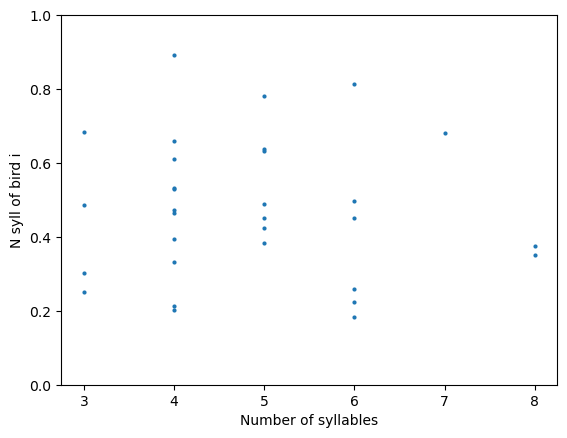

In [139]:
plt.scatter(prop_df.n_syll, prop_df.prop, lw=0, marker='.')
plt.ylim(0,1)
plt.xlabel('Number of syllables')
plt.ylabel('N syll of bird i')

plt.savefig(results_folder + 'prop_by_nsyll.png', bbox_inches='tight')

In [ ]:
plt.scatter(prop_df.n_syll, prop_df.prop, lw=0, marker='.')

In [131]:
path_length_diff_prop_yvals.shape, nsyll_labels.shape

((465,), (9300,))

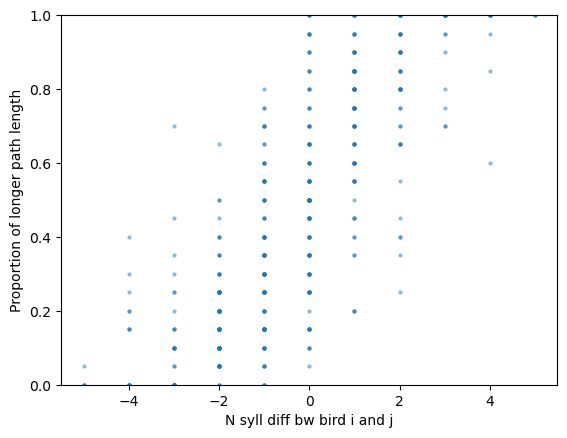

In [142]:
plt.scatter(nsyll_labels[::20], path_length_diff_prop_yvals, lw=0, marker='.', alpha=.5)
plt.ylim(0,1)
plt.ylabel('Proportion of longer path length')
plt.xlabel('N syll diff bw bird i and j')

plt.savefig(results_folder + 'prop_by_nsylldiff.png', bbox_inches='tight')

In [141]:
path_length_diff_prop_yvals.shape

(465,)